# Custom Discretization

In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame(pd.read_csv("./student_bucket.csv"))
data

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57
...,...,...,...,...,...
227,228,21,1st Class,no,42
228,229,20,2nd Class,no,47
229,230,20,3rd Class,yes,21
230,231,19,1st Class,yes,64


In [3]:
data.describe()

,Student_id,Age,marks
count,232.000000,232.000000,232.000000
mean,116.500000,19.896552,58.689655
std,67.116814,1.030944,23.200580
min,1.000000,18.000000,20.000000
25%,58.750000,19.000000,37.000000
50%,116.500000,20.000000,59.500000
75%,174.250000,21.000000,77.000000
max,232.000000,22.000000,98.000000


<AxesSubplot:>

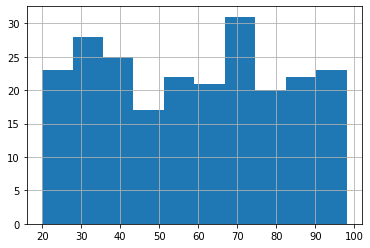

In [4]:
data.marks.hist()

# Create Custom Discretization With pd.cut() 

In [5]:
data['marks_cat'] = pd.cut(x = data['marks'], bins = 5, labels = ['Poor', 'Below Avg', 'Avg', 'Above Avg', 'Good'])

In [6]:
data.marks_cat.value_counts()

Above Avg    51
Poor         51
Good         45
Avg          43
Below Avg    42
Name: marks_cat, dtype: int64

<AxesSubplot:>

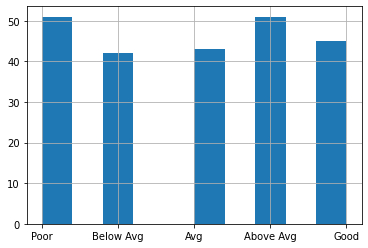

In [7]:
data.marks_cat.hist()

# plot graph with matplotlib

In [8]:
val = data.marks_cat.value_counts()

In [9]:
val.values

array([51, 51, 45, 43, 42])

In [10]:
val.index

CategoricalIndex(['Above Avg', 'Poor', 'Good', 'Avg', 'Below Avg'], categories=['Poor', 'Below Avg', 'Avg', 'Above Avg', 'Good'], ordered=True, dtype='category')

<BarContainer object of 5 artists>

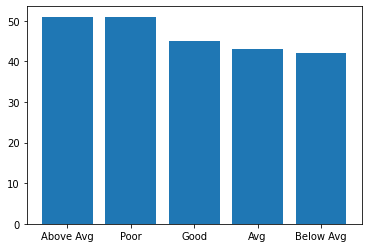

In [11]:
import matplotlib.pyplot as plt
plt.bar(val.index,val.values)

In [12]:
data.head()


,Student_id,Age,Grade,Employed,marks,marks_cat
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below Avg
2,3,18,1st Class,no,57,Avg
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Avg


# Create manual bins

In [13]:
data['marks_cat2'] = pd.cut(x = data.marks, bins = [0, 30, 50, 60, 80, 100], labels = ['Poor', 'Below Avg', 'Avg', 'Above Avg', 'Good'])

In [14]:
data.head()


,Student_id,Age,Grade,Employed,marks,marks_cat,marks_cat2
0,1,19,1st Class,yes,29,Poor,Poor
1,2,20,2nd Class,no,41,Below Avg,Below Avg
2,3,18,1st Class,no,57,Avg,Avg
3,4,21,2nd Class,no,29,Poor,Poor
4,5,19,1st Class,no,57,Avg,Avg


In [15]:
val = data.marks_cat2.value_counts()

<BarContainer object of 5 artists>

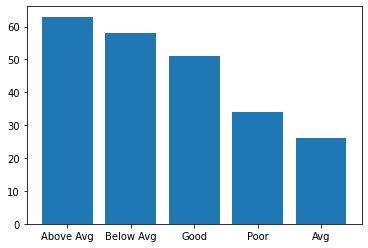

In [16]:
plt.bar(val.index,val.values)

# Example 2

In [28]:
my_data = {
    "Grade":[10,20,30] 
}
data = pd.DataFrame(my_data)
data

,Grade
0,10
1,20
2,30


array([[<AxesSubplot:title={'center':'Grade'}>]], dtype=object)

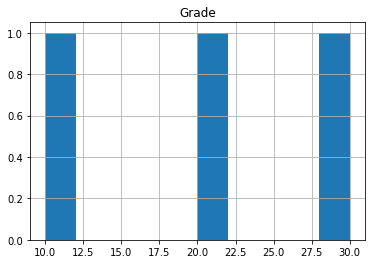

In [29]:
data.hist()

In [30]:
data["Garding"] = pd.cut(data.Grade,bins=3,labels=["bad","good","best"])

In [31]:
data

,Grade,Garding
0,10,bad
1,20,good
2,30,best


# Create Function

In [58]:
def custom(lists,bins,labels):
    dt = pd.DataFrame({"Grade":lists})
    dt["Grading"] = pd.cut(dt.Grade,bins=bins,labels=labels)
    return dt

In [59]:
custom([1,2,3,4],3,["bad","good","best"])

,Grade,Grading
0,1,bad
1,2,bad
2,3,good
3,4,best


In [60]:
custom([1,2,3,4,5],3,["bad","good","best"])

,Grade,Grading
0,1,bad
1,2,bad
2,3,good
3,4,best
4,5,best


In [61]:
custom([1,2,3,4,5,6],3,["bad","good","best"])

,Grade,Grading
0,1,bad
1,2,bad
2,3,good
3,4,good
4,5,best
5,6,best


In [62]:
custom([1,2,3,4,5],4,["very bad","bad","good","very good"])

,Grade,Grading
0,1,very bad
1,2,very bad
2,3,bad
3,4,good
4,5,very good


In [63]:
custom([1,2,3,4,5],5,["very bad","bad","good","very good","very very good"])

,Grade,Grading
0,1,very bad
1,2,bad
2,3,good
3,4,very good
4,5,very very good


# Create manual bins Example 2

In [65]:
def bins_custom(lists,bins,labels):
    dt = pd.DataFrame({"Grade":lists})
    dt["Grading"] = pd.cut(dt.Grade,bins=bins,labels=labels)
    return dt

In [80]:
bins_custom([1,2,3,4,5,6],[0,1,2],["Bad","Good"])

,Grade,Grading
0,1,Bad
1,2,Good
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN


In [74]:
bins_custom([1,2,3,4,5,6],[1,2,3],["Bad","Good"])

,Grade,Grading
0,1,NaN
1,2,Bad
2,3,Good
3,4,NaN
4,5,NaN
5,6,NaN


In [75]:
bins_custom([1,2,3,4,5,6],[2,3,4],["Bad","Good"])

,Grade,Grading
0,1,NaN
1,2,NaN
2,3,Bad
3,4,Good
4,5,NaN
5,6,NaN


In [76]:
bins_custom([1,2,3,4,5,6],[3,4,5],["Bad","Good"])

,Grade,Grading
0,1,NaN
1,2,NaN
2,3,NaN
3,4,Bad
4,5,Good
5,6,NaN


In [77]:
bins_custom([1,2,3,4,5,6],[4,5,6],["Bad","Good"])

,Grade,Grading
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,Bad
5,6,Good


In [78]:
bins_custom([1,2,3,4,5,6],[5,6,7],["Bad","Good"])

,Grade,Grading
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,Bad


In [79]:
bins_custom([1,2,3,4,5,6],[6,7,8],["Bad","Good"])

,Grade,Grading
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
